# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import requests
import time
import json
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
#list for latitude and longitudes
latsLongs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# zip the two lists into a single one
latsLongs = zip(lats, lngs)

# Get nearest city for random lat / long pair using citypy
for latLong in latsLongs:
    city = citipy.nearest_city(latLong[0], latLong[1]).city_name
    
    # Append to list of unique cities if not there already
    if city not in cities:
        cities.append(city)

len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
weatherData = {}
citiesWithWeatherData = []

for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    fullWeatherResponse = requests.get(query_url)

    #200 is a succesful query and we only add the city if it's new.
    if fullWeatherResponse.status_code == 200 and city not in weatherData:
        #get response in json format
        fullWeatherResponseJson = fullWeatherResponse.json()
        cityData = {}
        cityData["city"] = fullWeatherResponseJson["name"]
        cityData["id"] = fullWeatherResponseJson["id"]
        cityData["cloudiness"] = fullWeatherResponseJson['clouds']['all']
        cityData["country"] = fullWeatherResponseJson['sys']['country']
        cityData["date"] = fullWeatherResponseJson['dt']
        cityData["humidity"] = fullWeatherResponseJson['main']['humidity']
        cityData["lat"] = fullWeatherResponseJson['coord']['lat']
        cityData["lng"] = fullWeatherResponseJson['coord']['lon']
        cityData["maxTemp"] = fullWeatherResponseJson['main']['temp_max']
        cityData["windSpeed"] = fullWeatherResponseJson['wind']['speed']
        #create new weather entry for this current city
        weatherData[city] = cityData
        #append to list of cities that have valid weather data entry
        citiesWithWeatherData.append(city)
        print("Found data for City {0} with id {1}".format(fullWeatherResponseJson["name"] , fullWeatherResponseJson["id"]))


Found data for City Hermanus with id 3366880
Found data for City Torbay with id 6167817
Found data for City Spornoye with id 578283
Found data for City Jutaí with id 3663693
Found data for City Athabasca with id 5887916
Found data for City Cape Town with id 3369157
Found data for City La Ronge with id 6050066
Found data for City Port Alfred with id 964432
Found data for City Broome with id 5110365
Found data for City Airai with id 1651810
Found data for City Cockburn Town with id 3576994
Found data for City Bengkulu with id 1649150
Found data for City Pathein with id 1328421
Found data for City Nhulunbuy with id 2064735
Found data for City Punta Arenas with id 3874787
Found data for City Cayenne with id 3382160
Found data for City Atuona with id 4020109
Found data for City Ferrol with id 3123493
Found data for City Hilo with id 5855927
Found data for City Tres Arroyos with id 3833859
Found data for City Esperance with id 2071860
Found data for City Am Timan with id 245338
Found data fo

Found data for City Carutapera with id 3402648
Found data for City Rock Springs with id 5836898
Found data for City Tutóia with id 3385899
Found data for City Alexandria with id 361058
Found data for City Laguna with id 5364271
Found data for City Tuatapere with id 2180815
Found data for City Dargaville with id 2191911
Found data for City Fort Nelson with id 5955902
Found data for City Hambantota with id 1244926
Found data for City Hamilton with id 4513583
Found data for City Sapouy with id 2355869
Found data for City Aykhal with id 2027296
Found data for City Shiloh with id 4249910
Found data for City Tomatlán with id 3981391
Found data for City Padang with id 1633419
Found data for City Zwedru with id 2272491
Found data for City Rūdbār with id 1128239
Found data for City Xuzhou with id 1787824
Found data for City Nago with id 1856068
Found data for City Kaitangata with id 2208248
Found data for City Oranjemund with id 3354071
Found data for City Naraina with id 1261872
Found data for

Found data for City Xiangxiang with id 1790471
Found data for City Cherskiy with id 2126199
Found data for City Denpasar with id 1645528
Found data for City Khandyga with id 2022773
Found data for City Eyl with id 60019
Found data for City Grindavik with id 3416888
Found data for City Mandalgovi with id 2030065
Found data for City Bosaso with id 64013
Found data for City Esna with id 355449
Found data for City Qasigiannguit with id 3420768
Found data for City Tabory with id 1490364
Found data for City Batagay with id 2027044
Found data for City Awjilah with id 88533
Found data for City Starosubkhangulovo with id 488618
Found data for City Honiara with id 2108502
Found data for City Probolinggo with id 1630634
Found data for City Muriti with id 152497
Found data for City Ormara with id 1168700
Found data for City Warri with id 2319133
Found data for City Alugan with id 1731248
Found data for City Swan Hill with id 2147756
Found data for City Staraya Poltavka with id 489102
Found data fo

Found data for City Santa Barbara with id 5392952
Found data for City Paragominas with id 3393106
Found data for City Dudinka with id 1507116
Found data for City Kathmandu with id 1283240
Found data for City Baker City with id 5712169
Found data for City Superior with id 5275191
Found data for City Aberdeen with id 2657832
Found data for City Requena with id 2511930
Found data for City George with id 1002145
Found data for City Bom Jesus with id 3405304
Found data for City Develi with id 316795
Found data for City Haines Junction with id 5969025
Found data for City Dulce Grande with id 3974329
Found data for City Glomfjord with id 3155487
Found data for City Kavaratti with id 1267390
Found data for City Rostovka with id 1493523
Found data for City Novochernorechenskiy with id 1497132
Found data for City Lavrentiya with id 4031637
Found data for City Kasama with id 912764
Found data for City Nouadhibou with id 2377457
Found data for City Bayangol with id 2027002
Found data for City Druz

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
with open('CityData.csv', 'w', newline="\n") as csv_file:  
    writer = csv.writer(csv_file)
    #create list for column titles / header
    header = []
    #use keys of the city data as our column names
    #gets keys of dictionary cityData
    header = weatherData[citiesWithWeatherData[0]].keys()
    #write first row header
    writer.writerow(header)

    for key, value in weatherData.items():
        row = []
        for weatherKey, weatherValue in value.items():
            row.append(weatherValue)
        writer.writerow(row)

#create dataframe from csv file
weatherDataFrame = pd.read_csv("CityData.csv")
#print dataframe
weatherDataFrame.head()

,city,id,cloudiness,country,date,humidity,lat,lng,maxTemp,windSpeed
0,Hermanus,3366880,15,ZA,1584512108,94,-34.42,19.23,291.48,1.79
1,Torbay,6167817,75,CA,1584512108,74,47.67,-52.73,273.15,9.30
2,Spornoye,578283,0,RU,1584512108,55,50.84,37.29,274.15,4.00
3,Jutaí,3663693,99,BR,1584512108,98,-5.18,-68.90,295.90,0.83
4,Athabasca,5887916,83,CA,1584512108,98,54.72,-113.29,259.80,0.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

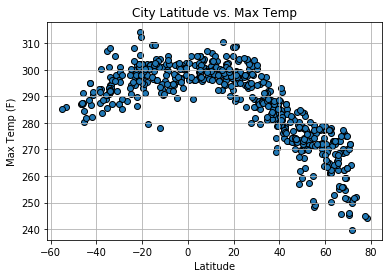

In [5]:
# Scatter plot
plt.scatter(weatherDataFrame["lat"],weatherDataFrame["maxTemp"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

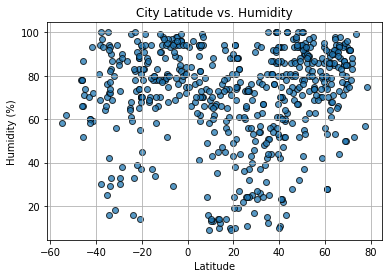

In [6]:
# Scatter plot
plt.scatter(weatherDataFrame["lat"],weatherDataFrame["humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("LatVsHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

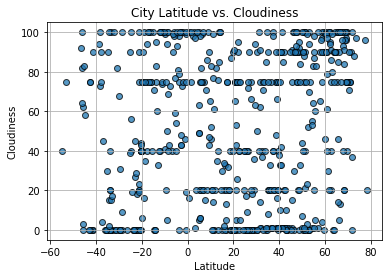

In [7]:
# Scatter plot
plt.scatter(weatherDataFrame["lat"],weatherDataFrame["cloudiness"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("LatVsClds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

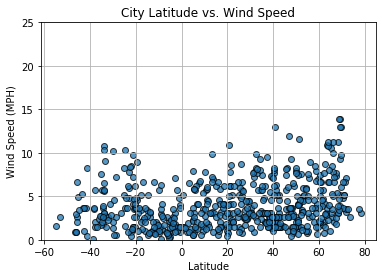

In [8]:
# Scatter plot
plt.scatter(weatherDataFrame["lat"],weatherDataFrame["windSpeed"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.ylim(0,25)
plt.grid(True)

plt.savefig("LatVsWindSpd.png")
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def CreateLinearRegPlot(xVals,yVals,xAxisLabel, yAxisLabel, filename):
    slope, intercept, rVal, pVal, stErr = linregress(xVals, yVals)
    regressVals = xVals * slope + intercept
    print(f"The r-squared value is: {rVal}")
    lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xVals,yVals)
    plt.plot(xVals,regressVals,"r-")
    plt.annotate(lineEq,(6,10),fontsize=15,color="red")
    plt.xlabel(xAxisLabel)
    plt.ylabel(yAxisLabel)
    plt.show()
    #save plot as png
    plt.savefig(f"output_data/{filename}.png")

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northDf = weatherDataFrame.loc[weatherDataFrame["lat"] >= 0.0]
northDf.reset_index(inplace=True)

southDf = weatherDataFrame.loc[weatherDataFrame["lat"] < 0.0]
southDf.reset_index(inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(northDf["lat"], northDf["maxTemp"], "Latitude", "Max Temp", "FIG1")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(southDf["lat"], southDf["maxTemp"], "Latitude", "Max Temp", "FIG2")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(northDf["lat"], northDf["humidity"], "Latitude", "Humidity", "FIG3")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(southDf["lat"], southDf["humidity"], "Latitude", "Humidity", "FIG4")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(northDf["lat"], northDf["cloudiness"], "Latitude", "Cloudiness", "FIG5")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(southDf["lat"], southDf["cloudiness"], "Latitude", "Cloudiness", "FIG6")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(northDf["lat"], northDf["windSpeed"], "Latitude", "Wind Speed", "FIG7")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
CreateLinearRegPlot(southDf["lat"], southDf["windSpeed"], "Latitude", "Wind Speed", "FIG8")